In [1]:
#import packages to scrape data from wikipedia 
from bs4 import BeautifulSoup
import urllib.request as urllib2
import csv
import os
from requests import get
import pandas as pd
import numpy as np
import sqlite3
from IPython.core.display import HTML 
import qgrid
import matplotlib.pyplot as plt

In [2]:
# define url for olympic medals 
medals_url = 'https://en.wikipedia.org/wiki/2018_Winter_Olympics_medal_table'

In [3]:
# scrape medals
medals_scraped = urllib2.urlopen(medals_url)
soup = BeautifulSoup(medals_scraped, 'html.parser')

In [4]:
medals_table = soup.find('table', attrs={'class':'wikitable sortable plainrowheaders'})

In [5]:
# convert to pandas df
df = pd.read_html(str(medals_table), header=0)
df = df[0]

In [6]:
# Ukraine, New Zealand, Latvia, Liechtenstein need fixing. Dropping Totals row. 
df.loc[21] = ['21', 'Ukraine (UKR)', 1, 0, 0, 1]
df.loc[26] = ['26', 'New Zealand (NZL)', 0, 0, 2, 2]
df.loc[28] = ['28', 'Latvia (LAT)', 0, 0, 1, 1]
df.loc[29] = ['28', 'Liechtenstein (LIE)', 0, 0, 1, 1]
df = df.drop(df.index[30])

In [7]:
# add data to SQL database
# data base path
data_base_path = os.path.expanduser('~/Documents/web-scrape')

#connect to database
conn = sqlite3.connect(os.path.join(data_base_path, 'medal_data.db'))

# add scraped data to db
df.to_sql(name='medals', con=conn, if_exists='replace')

# close connection
conn.close()

In [8]:
#query data from SQL database to make sortable web table. 

conn = sqlite3.connect(os.path.join(data_base_path, 'medal_data.db'))

cur = conn.cursor()

cur.execute("select * from medals;")
results = cur.fetchall()
cur.close()
conn.close()

In [9]:
#plotting medals. subsetting top ten . First make rank numeric
df.Rank = df.Rank.astype(int)
df_table = qgrid.show_grid(df)
df_table




QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

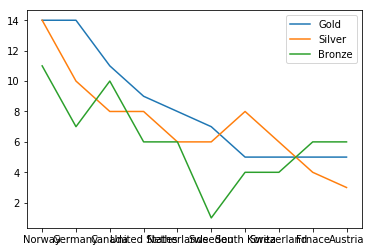

In [10]:
#filter top ten countries by total medals. Then plot 
top_ten = df[df.Rank <= 10]

x=[0,1,2,3,4,5,6,7,8,9]
ycols=['Gold','Silver','Bronze']
myxticks=['Norway','Germany','Canada','United States','Netherlands','Sweeden','South Korea','Switzerland','Frnace','Austria']


top_ten.plot(y=ycols)
plt.xticks(x,myxticks)
plt.show()



